In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_df.shape

(614, 13)

In [6]:
test_df.shape

(367, 12)

In [8]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train_df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002753,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
train_original=train_df.copy()
test_original=test_df.copy()

In [12]:
train_original.shape

(614, 13)

In [13]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
test_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [15]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
#Univariate Analysis

In [17]:
#Target Variable

In [26]:
train_df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
sc=train_df.Loan_Status.value_counts(normalize=True)
print(sc)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


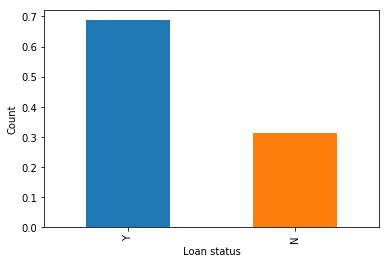

In [28]:
plt.figure()
plt.xlabel("Loan status")
plt.ylabel("Count")
sc.plot(kind="bar")

In [29]:
train_df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002753,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Male      489
Female    112
Name: Gender, dtype: int64

******************
Male      489
Female    112
Name: Gender, dtype: int64
******************
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
*******************


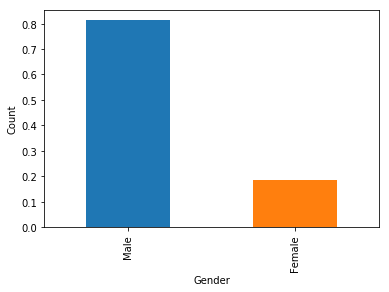

In [37]:
count=train_df.Gender.value_counts()
print("******************")
print(count)
print("******************")
gc=train_df.Gender.value_counts(normalize=True)
print(gc)
print("*******************")
plt.figure()
plt.xlabel("Gender")
plt.ylabel("Count")
gc.plot(kind="bar")

******************
Yes    398
No     213
Name: Married, dtype: int64
******************
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
*******************


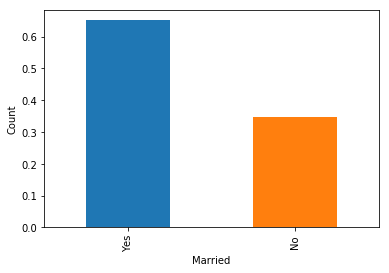

In [38]:
count=train_df.Married.value_counts()
print("******************")
print(count)
print("******************")
gc=train_df.Married.value_counts(normalize=True)
print(gc)
print("*******************")
plt.figure()
plt.xlabel("Married")
plt.ylabel("Count")
gc.plot(kind="bar")

******************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
******************
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
*******************


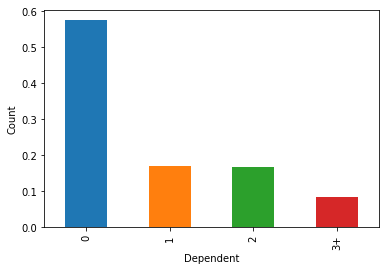

In [39]:
count=train_df.Dependents.value_counts()
print("******************")
print(count)
print("******************")
gc=train_df.Dependents.value_counts(normalize=True)
print(gc)
print("*******************")
plt.figure()
plt.xlabel("Dependent")
plt.ylabel("Count")
gc.plot(kind="bar")

******************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
******************
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
*******************


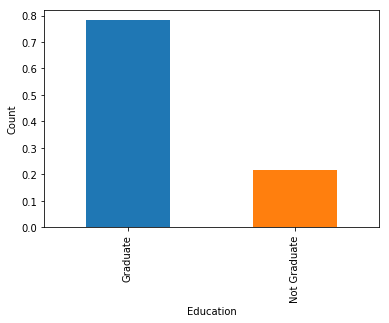

In [40]:
count=train_df.Education.value_counts()
print("******************")
print(count)
print("******************")
gc=train_df.Education.value_counts(normalize=True)
print(gc)
print("*******************")
plt.figure()
plt.xlabel("Education")
plt.ylabel("Count")
gc.plot(kind="bar")

******************
No     500
Yes     82
Name: Self_Employed, dtype: int64
******************
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
*******************


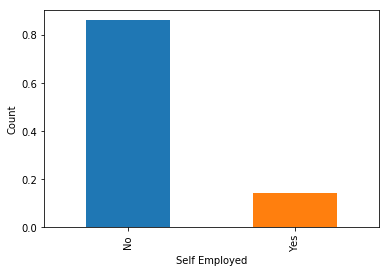

In [41]:
count=train_df.Self_Employed.value_counts()
print("******************")
print(count)
print("******************")
gc=train_df.Self_Employed.value_counts(normalize=True)
print(gc)
print("*******************")
plt.figure()
plt.xlabel("Self Employed")
plt.ylabel("Count")
gc.plot(kind="bar")

******************
1.0    475
0.0     89
Name: Credit_History, dtype: int64
******************
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64
*******************


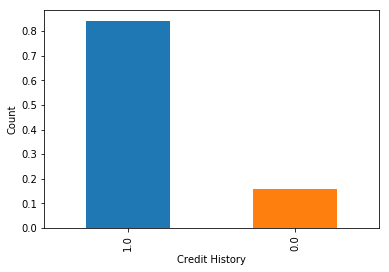

In [42]:
count=train_df.Credit_History.value_counts()
print("******************")
print(count)
print("******************")
gc=train_df.Credit_History.value_counts(normalize=True)
print(gc)
print("*******************")
plt.figure()
plt.xlabel("Credit History")
plt.ylabel("Count")
gc.plot(kind="bar")

******************
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
******************
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
*******************


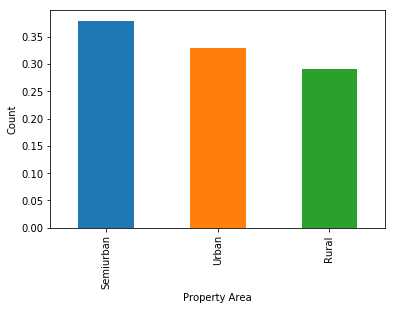

In [52]:
count=train_df.Property_Area.value_counts()
print("******************")
print(count)
print("******************")
gc=train_df.Property_Area.value_counts(normalize=True)
print(gc)
print("*******************")
plt.figure()
plt.xlabel("Property Area")
plt.ylabel("Count")
gc.plot(kind="bar")

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


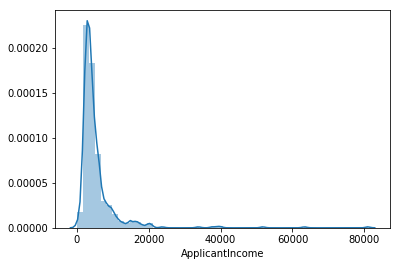

In [44]:
sns.distplot(train_df['ApplicantIncome'])

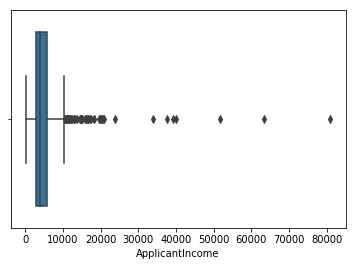

In [50]:
sns.boxplot(x=train_df["ApplicantIncome"])

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


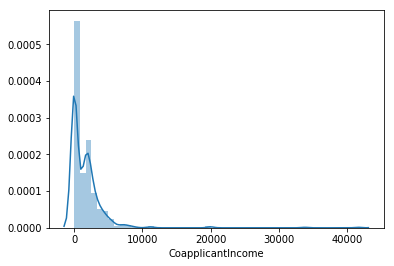

In [47]:
sns.distplot(train_df['CoapplicantIncome'])

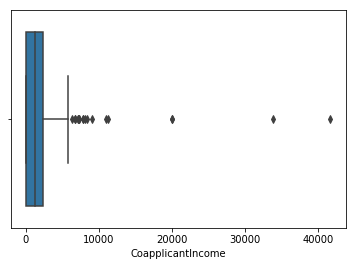

In [51]:
sns.boxplot(x=train_df["CoapplicantIncome"])

In [54]:
#BiVariate Analysis
    #Categorical varibale with continuous varibale

In [56]:
gender=pd.crosstab(train_df.Gender,train_df.Loan_Status)
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [61]:
genap=gender.div(gender.sum(1).astype(float),axis=0)
genap

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


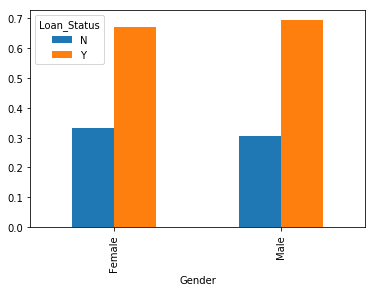

In [62]:
genap.plot(kind='bar')

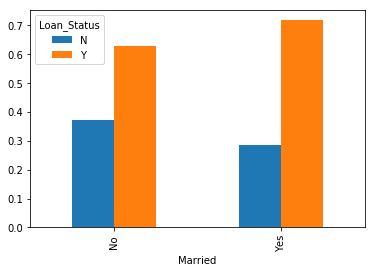

In [67]:
married=pd.crosstab(train_df['Married'],train_df['Loan_Status']) 
maap=married.div(married.sum(1).astype(float),axis=0)
maap.plot(kind='bar')

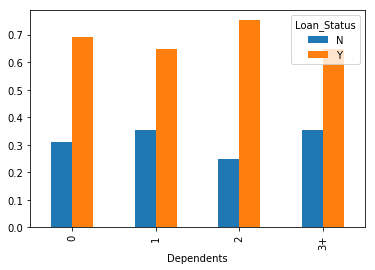

In [68]:
dependents=pd.crosstab(train_df['Dependents'],train_df['Loan_Status']) 
daap=dependents.div(dependents.sum(1).astype(float),axis=0)
daap.plot(kind='bar')

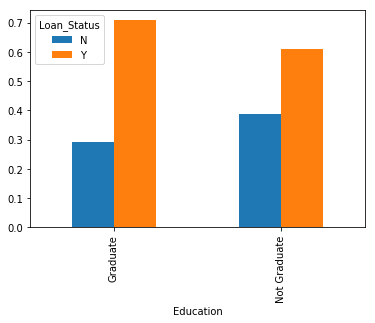

In [69]:
education=pd.crosstab(train_df['Education'],train_df['Loan_Status']) 
eaap=education.div(education.sum(1).astype(float),axis=0)
eaap.plot(kind='bar')

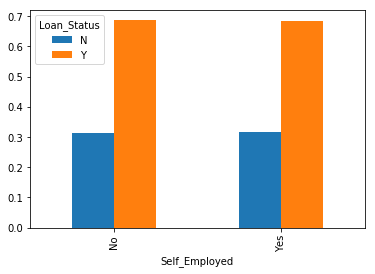

In [70]:
self_smployed=pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])
saap=self_smployed.div(self_smployed.sum(1).astype(float),axis=0)
saap.plot(kind='bar')

In [71]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
train_df['Dependents'].replace('3+', 3,inplace=True) 
test_df['Dependents'].replace('3+', 3,inplace=True)
train_df['Loan_Status'].replace('N', 0,inplace=True)
train_df['Loan_Status'].replace('Y', 1,inplace=True)

In [74]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [75]:
matrix=train_df.corr()
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


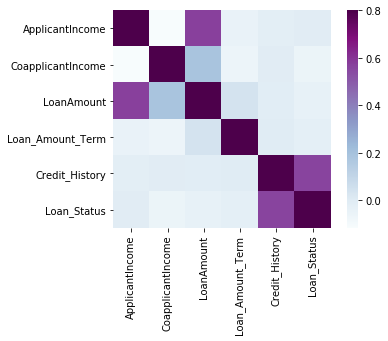

In [76]:
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

In [77]:
#Missing value Imputation

In [78]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [80]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True) 
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

In [81]:
train_df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [82]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

In [83]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

In [85]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [86]:
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True) 
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)

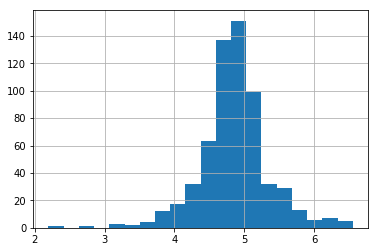

In [88]:
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'])
train_df['LoanAmount_log'].hist(bins=20) 
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

In [89]:
train_df=train_df.drop('Loan_ID',axis=1) 
test_df=test_df.drop('Loan_ID',axis=1)

In [90]:
X = train_df.drop('Loan_Status',1) 
y = train_df.Loan_Status

In [92]:
X=pd.get_dummies(X) 
train_df=pd.get_dummies(train_df) 
test_df=pd.get_dummies(test_df)

In [93]:
train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,5.587249,0,1,0,...,0,0,1,1,0,0,1,0,0,1
6,2333,1516.0,95.0,360.0,1.0,1,4.553877,0,1,0,...,1,0,0,0,1,1,0,0,0,1
7,3036,2504.0,158.0,360.0,0.0,0,5.062595,0,1,0,...,0,0,0,1,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,1,5.123964,0,1,0,...,0,0,1,1,0,1,0,0,0,1
9,12841,10968.0,349.0,360.0,1.0,0,5.855072,0,1,0,...,0,1,0,1,0,1,0,0,1,0


In [95]:
X_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.3)

In [97]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
y_pred=model.predict(x_val)

In [100]:
accuracy=accuracy_score(y_val,y_pred)

In [101]:
accuracy

0.7891891891891892

In [105]:
pred_test=model.predict(test_df)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [102]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [106]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [107]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [108]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [117]:
d=pd.read_csv("logistic.csv")
e=d.drop('Unnamed: 0',1)
e.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [120]:
e.to_csv("submission2.csv",index=False)

In [121]:
z=pd.read_csv("submission2.csv")
z.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [167]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
skf.get_n_splits(X,y)

5

In [168]:
print(skf)

StratifiedKFold(n_splits=5, random_state=1, shuffle=True)


In [169]:
i=1
for train_index, test_index in skf.split(X,y):
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]

In [170]:
model = LogisticRegression(random_state=1)
model.fit(xtr, ytr)  
pred_test = model.predict(xvl)   
score = accuracy_score(yvl,pred_test)  

In [171]:
score

0.8278688524590164

In [173]:
pred_test = model.predict(test_df)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

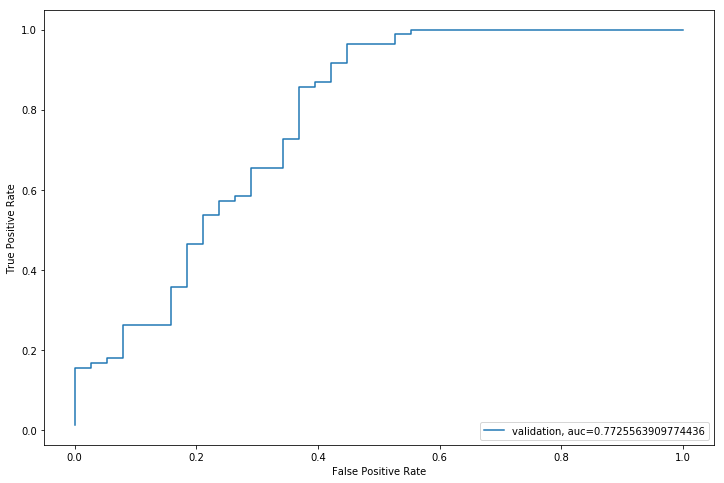

In [175]:
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4) 
plt.show()

In [177]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [178]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [180]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic2.csv',index=False)

# Feature Engineering

In [181]:
train_df['Total_income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
test_df['Total_income']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


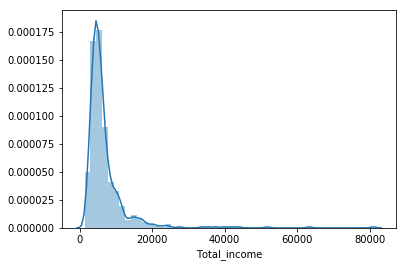

In [182]:
sns.distplot(train_df.Total_income)

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


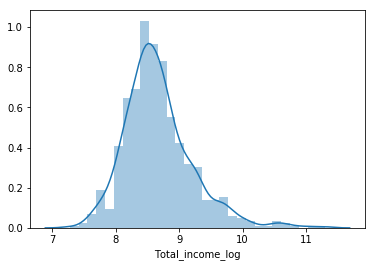

In [183]:
train_df['Total_income_log']=np.log(train_df['Total_income'])
sns.distplot(train_df['Total_income_log'])

In [184]:
test_df['Total_income_log']=np.log(test_df['Total_income'])

In [185]:
train_df['EMI']=train_df['LoanAmount']/train_df['Loan_Amount_Term']
test_df['EMI']=test_df['LoanAmount']/test_df['Loan_Amount_Term']

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


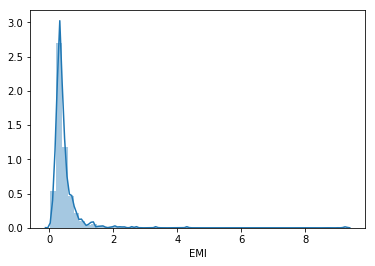

In [186]:
sns.distplot(train_df.EMI)

In [188]:
train_df['Balance_Income']=train_df['Total_income']-(train_df['EMI']*1000)
test_df['Balance_Income']=test_df['Total_income']-(test_df['EMI']*1000)

C:\Users\mitra.nand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


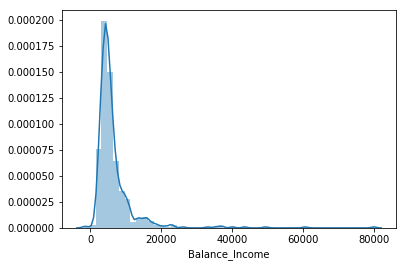

In [189]:
sns.distplot(train_df.Balance_Income)

In [190]:
train_df=train_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test_df=test_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [192]:
X=train_df.drop('Loan_Status',1)
y=train_df.Loan_Status

In [199]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index] 
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test_df) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


In [200]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic3.csv',index=False)

In [205]:
i=1 
kfs = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kfs.split(X,y):
    print('\n{} of kfold {}'.format(i,kfs.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvls = y[train_index],y[test_index] 
    dt = DecisionTreeClassifier(random_state=1)     
    dt.fit(xtr, ytr)     
    pred_y = dt.predict(xvl)     
    scores = accuracy_score(yvls,pred_y)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = dt.predict(test_df) 
    pred=dt.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8278688524590164

2 of kfold 5
accuracy_score 0.8278688524590164

3 of kfold 5
accuracy_score 0.8278688524590164

4 of kfold 5
accuracy_score 0.8278688524590164

5 of kfold 5
accuracy_score 0.8278688524590164


In [206]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('decision.csv',index=False)

In [207]:
i=1 
kfs = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kfs.split(X,y):
    print('\n{} of kfold {}'.format(i,kfs.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvls = y[train_index],y[test_index] 
    dt = RandomForestClassifier(random_state=1,max_depth=10)     
    dt.fit(xtr, ytr)     
    pred_y = dt.predict(xvl)     
    scores = accuracy_score(yvls,pred_y)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = dt.predict(test_df) 
    pred=dt.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8278688524590164

2 of kfold 5
accuracy_score 0.8278688524590164

3 of kfold 5
accuracy_score 0.8278688524590164

4 of kfold 5
accuracy_score 0.8278688524590164

5 of kfold 5
accuracy_score 0.8278688524590164


In [208]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('randomforest.csv',index=False)

In [209]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise',estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',            max_depth=None, max_features='auto', max_leaf_nodes=None,            min_impurity_decrease=0.0, min_impurity_split=None,            min_samples_leaf=1, min_samples_split=2,            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,            oob_score=False, random_state=1, verbose=0, warm_start=False),       
fit_params=None, iid=True, n_jobs=1,       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       
pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',       
scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [215]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test_df) 
    pred2=model.predict_proba(test_df)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.819672131147541


In [216]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('randomforests.csv',index=False)

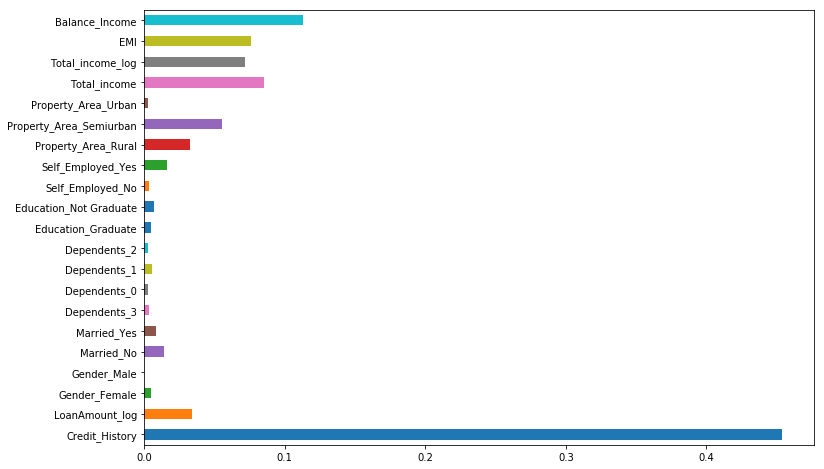

In [217]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))